# <font color='green'>Homework 3</font>

<div class="alert alert-block alert-warning">
<b>
University of Tehran<br>
Spring 2023<br>
Course: Machine Learning<br>
</div>


***

<div class="alert alert-block alert-success">
<b>Author:</b><br>
Name: Taban Soleymani <br />
Student Number: 810100377
</div>

***

# <span style="color:purple">Importing Required Packages and Classes</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split

# <span style="color:purple">Question 9</span>

In [2]:
df=pd.read_csv("/content/sample_data/Diabetes.csv")
df.head()

,pregnant,glucose,BP,skin,insulin,BMI,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
x = df.drop('label', axis = 1)
print('features:\n')
print(x)

features:

     pregnant  glucose  BP  skin  insulin   BMI  pedigree  age
0           6      148  72    35        0  33.6     0.627   50
1           1       85  66    29        0  26.6     0.351   31
2           8      183  64     0        0  23.3     0.672   32
3           1       89  66    23       94  28.1     0.167   21
4           0      137  40    35      168  43.1     2.288   33
..        ...      ...  ..   ...      ...   ...       ...  ...
763        10      101  76    48      180  32.9     0.171   63
764         2      122  70    27        0  36.8     0.340   27
765         5      121  72    23      112  26.2     0.245   30
766         1      126  60     0        0  30.1     0.349   47
767         1       93  70    31        0  30.4     0.315   23

[768 rows x 8 columns]


In [4]:
y = df['label']
print('labels:\n')
print(y)

labels:

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: label, Length: 768, dtype: int64


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [6]:
model1 = DecisionTreeClassifier()
model1 = model1.fit(x_train,y_train)
y_pred = model1.predict(x_test)

accuracy: 0.7229437229437229
precision: 0.6438356164383562
recall: 0.5529411764705883


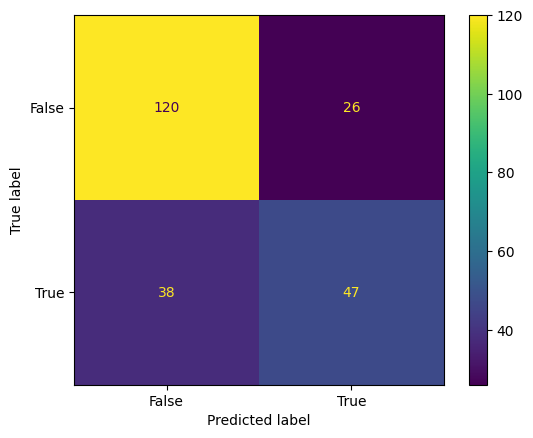

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

confusion_matrix1 = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix1.ravel()

accuracy = sum(1 for x, y in zip(y_test, y_pred) if x == y) / len(y_test)
precision = tp / (tp + fp)
recall = tp / (tp + fn)

print("accuracy:", accuracy)
print("precision:", precision)
print("recall:", recall)

cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix1, display_labels=[False, True])
cm_display.plot()
plt.show() 

In [10]:
y_pred_t = model1.predict(x_train)
accuracy = accuracy_score(y_pred_t, y_train)
print('accuracy in train set: ', accuracy)

accuracy in train set:  1.0


In [11]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image 
! pip install pydotplus
import pydotplus
! pip install graphviz
import graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


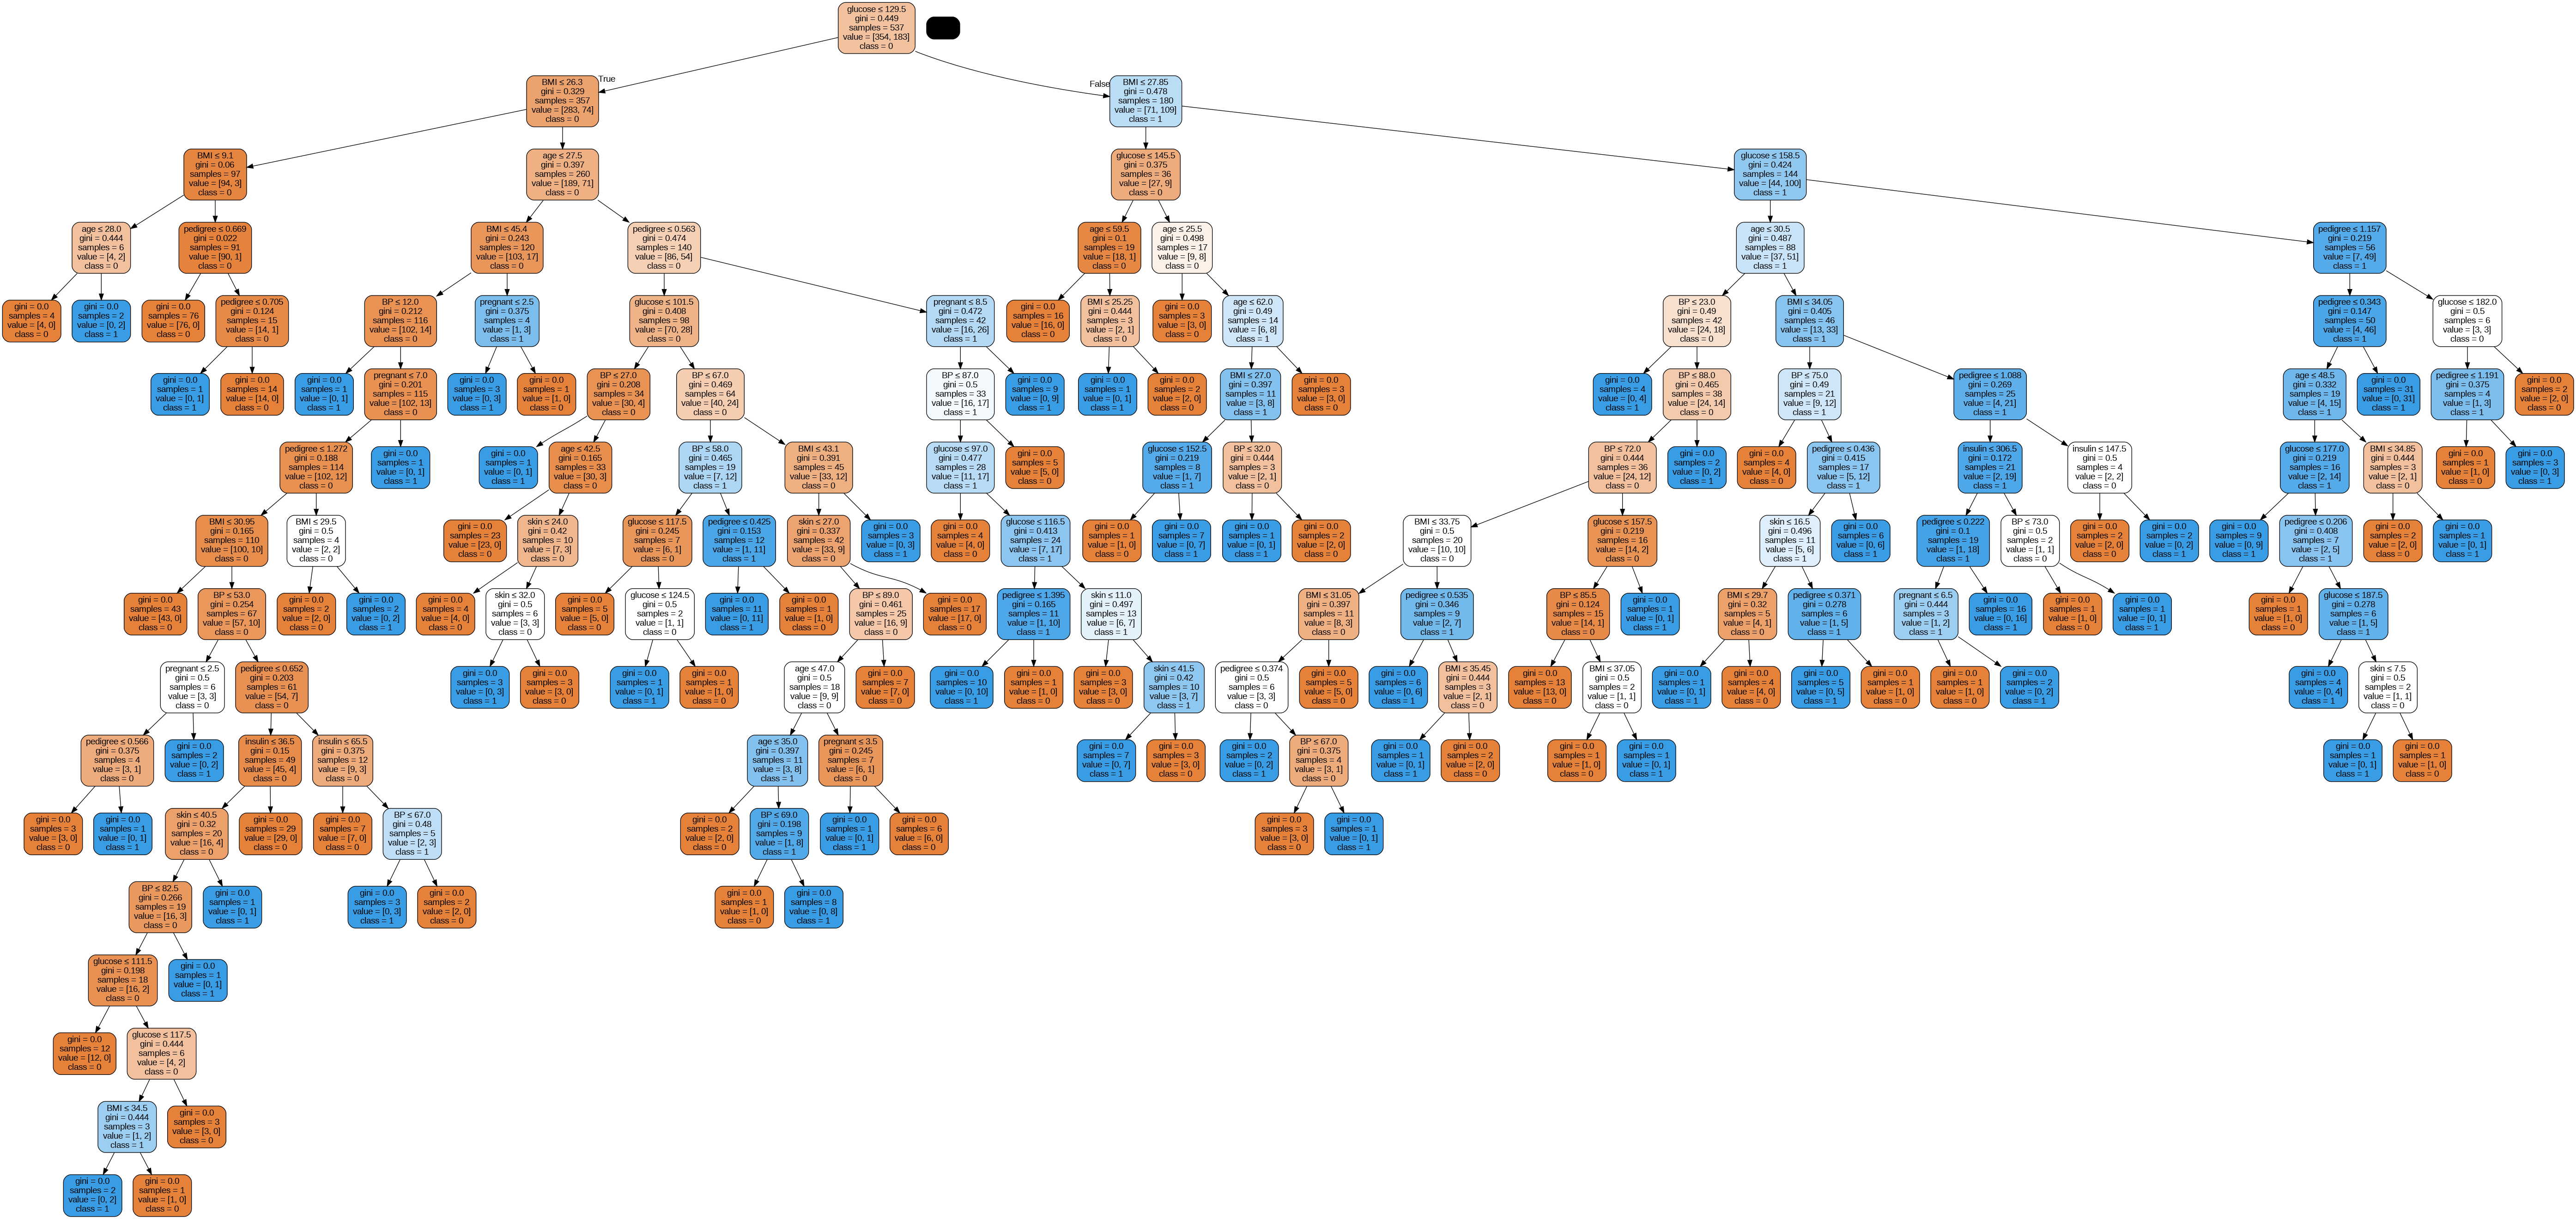

In [12]:
dot_data = StringIO()
export_graphviz(model1, out_file=dot_data ,filled=True, rounded=True,special_characters=True,feature_names = x.columns, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_set.png')
Image(graph.create_png())

In [13]:
model2 = DecisionTreeClassifier(criterion="entropy", max_depth=2)
model2 = model2.fit(x_train,y_train)
y_pred = model2.predict(x_test)

accuracy: 0.7705627705627706
precision: 0.7105263157894737
recall: 0.6352941176470588


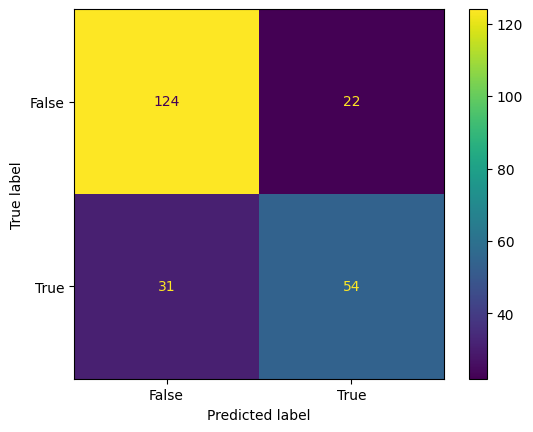

In [14]:
confusion_matrix2 = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix2.ravel()

accuracy = sum(1 for x, y in zip(y_test, y_pred) if x == y) / len(y_test)
precision = tp / (tp + fp)
recall = tp / (tp + fn)

print("accuracy:", accuracy)
print("precision:", precision)
print("recall:", recall)

cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix2, display_labels=[False, True])
cm_display.plot()
plt.show() 

In [16]:
y_pred_t = model1.predict(x_train)
accuracy = accuracy_score(y_pred_t, y_train)
print('accuracy in train set: ', accuracy)

accuracy in train set:  1.0


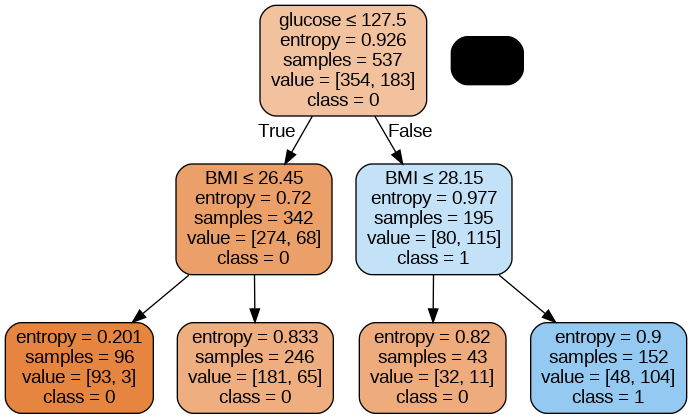

In [15]:
dot_data = StringIO()
export_graphviz(model2, out_file=dot_data ,filled=True, rounded=True,special_characters=True,feature_names = x.columns, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_set2.png')
Image(graph.create_png())